In [2]:
import numpy as np
import matplotlib.pyplot as plt

def W(a):
    return np.array([[a, 1j*np.sqrt(1-a**2)],[1j*np.sqrt(1-a**2), a]])

def exponential(phi):
    return np.array([[np.exp(1j*phi), 0],[0, np.exp(-1j*phi)]])

def U(a, phi):
    prod = exponential(phi[0])
    for i in phi[1:]:
        prod = prod*W(a)*exponential(i)
    return prod


In [3]:
# Constants
eta = 1/2*np.arccos(-1/4)
BB1 = [np.pi/2, -eta, 2*eta, 0, -2*eta, eta]
a = np.linspace(-1,1,100)

/home/robi/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


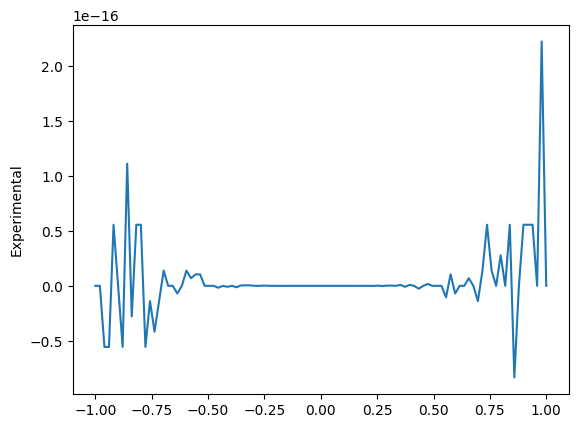

In [4]:
# Experimental:
P_bb1 = []
for i in a:
    P_bb1.append(U(i, BB1)[0,0])
plt.figure()
plt.plot(a, P_bb1)
plt.ylabel('Experimental')
plt.show()


# U = np.exp(1j * )

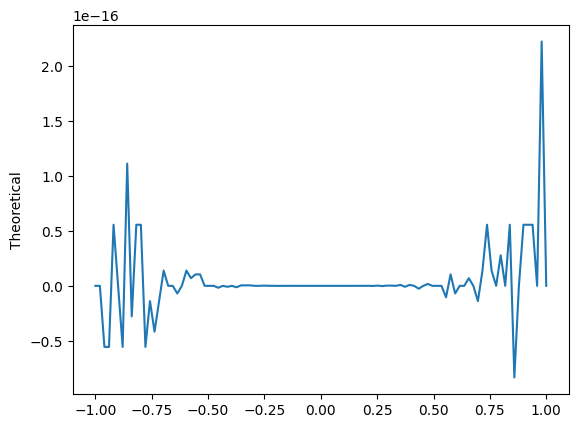

In [5]:
# Theoretical:
def P_bb1_teor(a):
    return -1/8*a*((np.sqrt(15) - 15j)-2*(np.sqrt(15), 5j)*a**2+(np.sqrt(15)-3j)*a**4)
P_bb1_Teor=[]
for i in a:
    P_bb1_Teor.append(U(i, BB1)[0,0])
plt.figure()
plt.plot(a, P_bb1_Teor)
plt.ylabel('Theoretical')
plt.show()



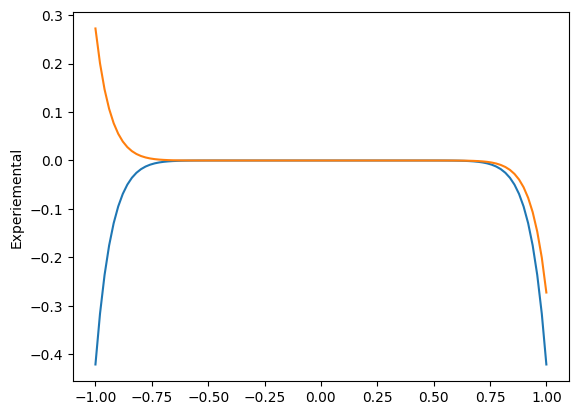

In [10]:
def ReU(U):
    return np.real(U)

phi_cos = (-1.70932079, -0.05312746, 2.12066859, -0.83307065, -0.50074601, 0.40728859, 0.32838472, 0.9142489, -2.81320793, 0.40728859, -0.50074601, 2.30852201, -1.02092406, -0.05312746, 3.00306819)
phi_sin = (-1.63276817, 0.20550406, -0.84198335, 0.39732059, -0.26820613, 2.41324245, 0.04662674, -2.02847501, 1.11311765, 0.04662674, -0.72835021, -0.26820613, 0.39732059, -0.84198335, 0.20550406, -0.06197184)

Re_U_cos_exp = []
Re_U_sin_exp = []

for i in a:
    Re_U_cos_exp.append(ReU(1/2 * (np.array([1.0, 1.0]) @ U(i,phi_cos)) @ np.array([[1.0],[1.0]])))
    Re_U_sin_exp.append(ReU(1/2 * (np.array([1.0, 1.0]) @ U(i,phi_sin)) @ np.array([[1.0],[1.0]])))

plt.figure()
plt.plot(a, Re_U_cos_exp)
plt.plot(a, Re_U_sin_exp)
plt.ylabel('Experiemental')
plt.show()


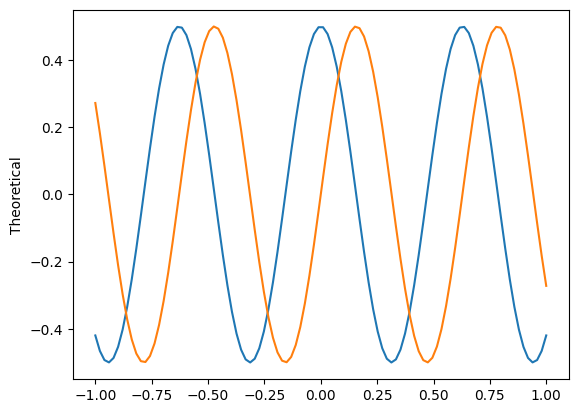

In [7]:
Re_U_cos_teor = []
Re_U_sin_teor = []

t = 10

for i in a:
    Re_U_cos_teor.append(1/2 * np.cos(i*t))
    Re_U_sin_teor.append(1/2 * np.sin(i*t))

plt.figure()
plt.plot(a, Re_U_cos_teor)
plt.plot(a, Re_U_sin_teor)
plt.ylabel('Theoretical')
plt.show()

In [1]:
from numpy.polynomial.polynomial import Polynomial
# example for polynomial p(x) = -2 + 5x**2 + x**3
pcoefs = [0., 1.0/3.0, 0., 5.0/4.0]
poly = Polynomial(pcoefs)

from pyqsp.angle_sequence import QuantumSignalProcessingPhases
phi = QuantumSignalProcessingPhases(poly, signal_operator="Wx", method="laurent")

/home/robi/University/Adv_con_CQ/hw9/pyqsp/completion.py:172: RuntimeWarning: invalid value encountered in sqrt
  G = LPoly(gcoefs * np.sqrt(norm / gcoefs[0]), -len(gcoefs) + 1)


CompletionError: Completion Failed. Input F = [0.15624062 0.63537187 0.63537187 0.15624062] could not be completed